In [1]:
from module.EmbeddedAttackModel import EmbeddedAttackModel, TargetModel, AttackHelper
from module.utils import * 
from module.gs_mim import GradSmoothMomentumIterativeMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
batch_shape = (50, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

{'ep_ratio': 0.01, 'nb_iter': 2, 'y': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'eps': 2.5500000000000003, 'eps_iter': 1.2750000000000001, 'clip_min': 0, 'clip_max': 255}


D:\Develop\IJCAI2019\IJCAI19_AliAAAC\module\gs_mim.py:204: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt
Attack runs: 202.71 s
L2 1.996147944779329
INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 predict runs: 9.32 s
inception_v1 predict accuracy : 0.30000001192092896
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 12.99 s
resnetv1_50 predict accuracy : 0.23999999463558197
INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt
vgg_16 predict runs: 19.07 s
vgg_16 predict accuracy : 0.30000001192092896


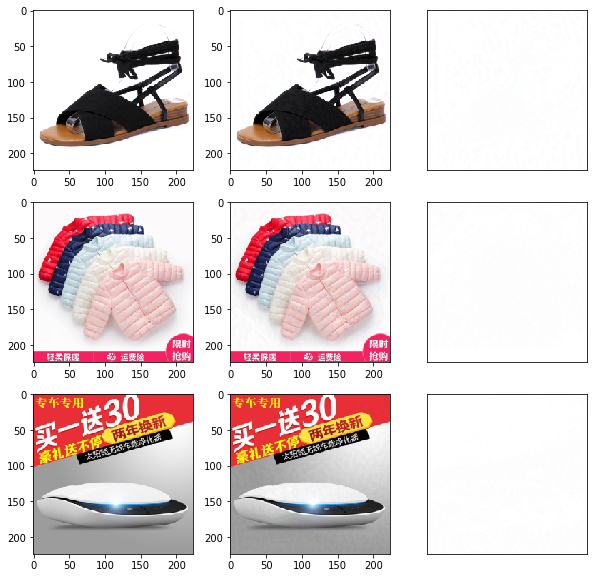

In [3]:
name = 'inception_v1'
T1 = TargetModel(batch_shape, 110, name=name)
name = 'resnetv1_50'
T2 = TargetModel(batch_shape, 110, name=name)
name = 'vgg_16'
T3 = TargetModel(batch_shape, 110, name=name)

A = EmbeddedAttackModel(batch_shape, 110)
A.add_model(T1)
A.add_model(T2)
A.add_model(T3)

attack_params = {"ep_ratio":0.01, "nb_iter":2, 'y':Y}
# Xadv = AttackHelper(A, X, Y, MomentumIterativeMethod, attack_params)
Xadv = AttackHelper(A, X, Y, GradSmoothMomentumIterativeMethod, attack_params)
plot_images(X, Xadv, n=3)


In [4]:
for m in A.models:
    m.predict(X,Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 predict runs: 9.24 s
inception_v1 predict accuracy : 1.0
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 12.57 s
resnetv1_50 predict accuracy : 1.0
INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt
vgg_16 predict runs: 19.03 s
vgg_16 predict accuracy : 0.9800000190734863
